In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('Sensor.csv')
print(data)


x=np.asanyarray(data.drop(columns=['D']))
y=np.asanyarray(data['D'])

x_t,x_ts,y_t,y_ts= train_test_split(x,y,test_size=0.2)

y_t=keras.utils.to_categorical(y_t,9)
y_ts=keras.utils.to_categorical(y_ts,9)

       S1   S2   S3  D
0      85   93  103  4
1     155  160  115  3
2     162  160  115  3
3     147  104   73  6
4      33   32   24  7
...   ...  ...  ... ..
2695  121  117   91  8
2696  155  160  115  3
2697  116  153  100  5
2698  121  120   92  8
2699  155  127   98  6

[2700 rows x 4 columns]


In [3]:
  model = Sequential()
  model.add(Dense(32,activation='relu',input_shape=[3]))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(9,activation='softmax'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
hist= model.fit(x_t,y_t,batch_size=10,epochs=150,verbose=0,validation_data=(x_ts,y_ts))

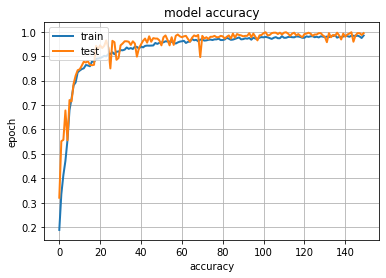

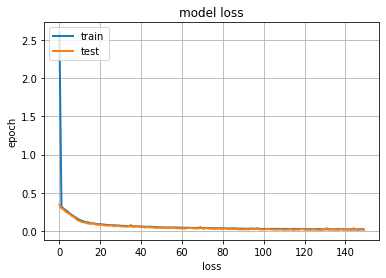

In [5]:
plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.show()


plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.show()

In [6]:
ypred=model.predict(x)
ypred=np.argmax(ypred,axis=1)


print('metricas: \n',classification_report(y,ypred))
print('confusion matrix: \n', confusion_matrix(y,ypred))

metricas: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.99      0.99      0.99       300
           2       0.99      1.00      0.99       300
           3       1.00      0.99      0.99       300
           4       1.00      1.00      1.00       300
           5       0.99      1.00      1.00       300
           6       0.99      0.99      0.99       300
           7       0.97      0.97      0.97       300
           8       0.97      0.97      0.97       300

    accuracy                           0.99      2700
   macro avg       0.99      0.99      0.99      2700
weighted avg       0.99      0.99      0.99      2700

confusion matrix: 
 [[299   0   0   0   0   1   0   0   0]
 [  1 296   0   0   0   0   3   0   0]
 [  0   1 299   0   0   0   0   0   0]
 [  0   0   1 298   0   0   0   1   0]
 [  0   0   0   0 299   1   0   0   0]
 [  0   0   1   0   0 299   0   0   0]
 [  0   1   0   0   1   0 298